### jupyter zbMATH Links API demo

This notebooks demonstrates some of the capabilites of the zbMATH links API.

In [5]:
import pandas as pd
import matplotlib
matplotlib.rcParams['figure.figsize'] = (20, 10)

Load statics for msc distribtion.

In [2]:
msc = pd.read_json('https://zblink.formulasearchengine.com/links_api/statistics/msc/')
msc = msc.rename(columns={msc.columns[0]:'msc',msc.columns[1]:'count'})
msc = msc.set_index('msc')
msc.head()

,count
msc,
33,491
65,351
11,172
34,169
41,74


<AxesSubplot:xlabel='msc'>

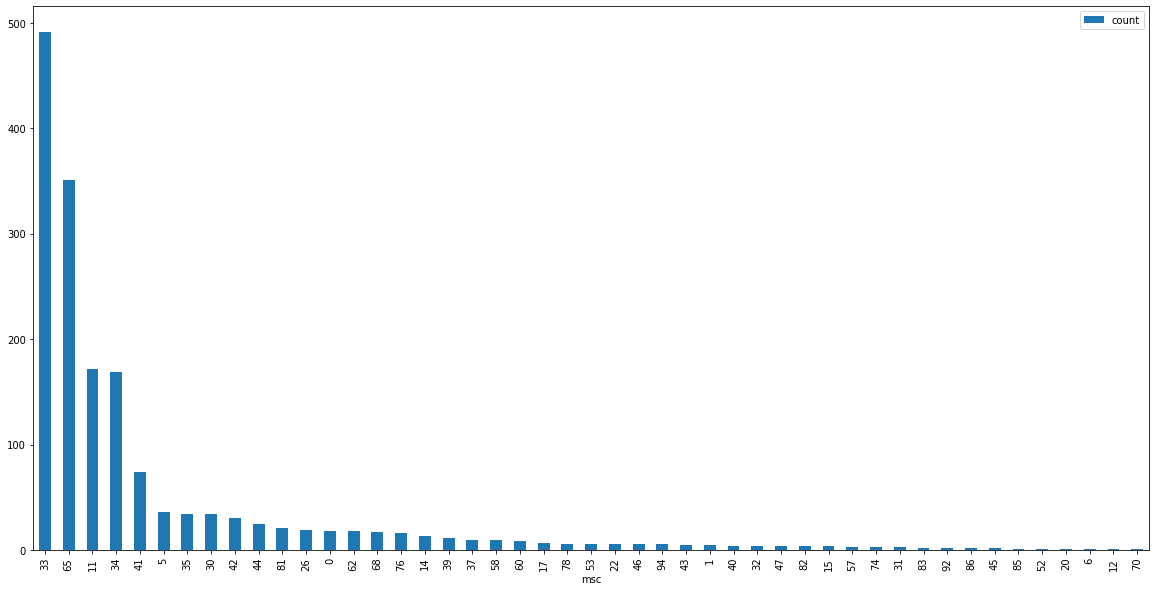

In [6]:
msc.plot(y='count',kind='bar')

In the same way one can derive the year distribution

In [7]:
y = pd.read_json('https://zblink.formulasearchengine.com/links_api/statistics/years/')
y = y.rename(columns={y.columns[0]:'year',y.columns[1]:'count'})
y = y.set_index('year')
y

,count
year,
1998,67
1999,65
1995,65
1992,58
1994,58
...,...
1938,2
1931,2
1943,1


<AxesSubplot:xlabel='year'>

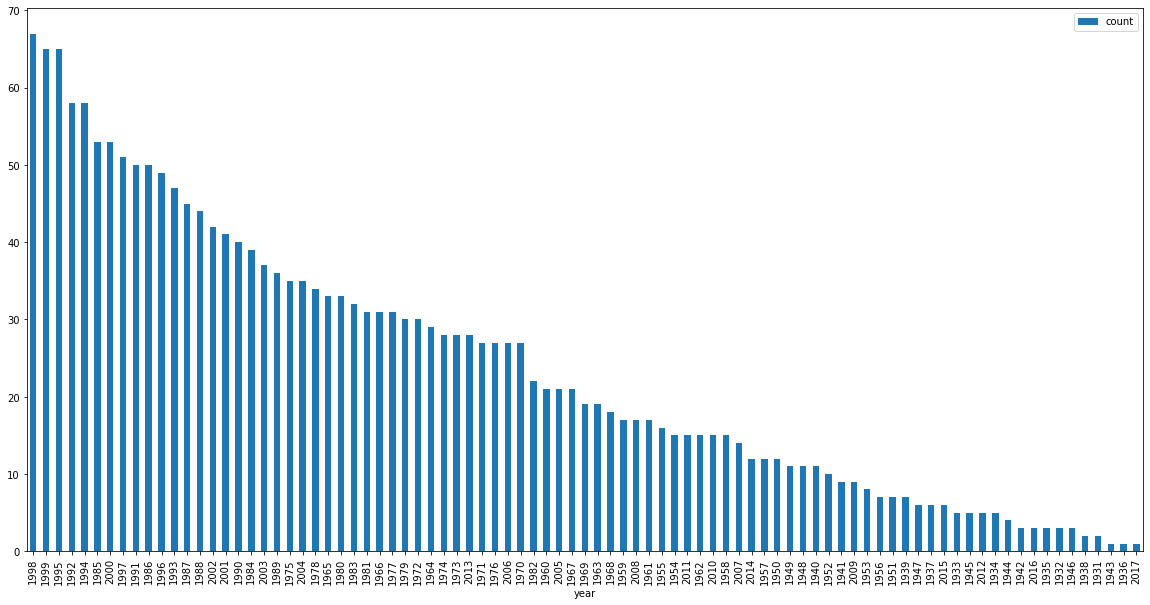

In [8]:
y.plot(kind='bar',y='count')

Instead of the preprocessed statistics one can also access the uderling data in the scholix format. In the example below we filter for links that point to a MSC class 14.

In [9]:
import requests, json
alg_geo_json = requests.get('https://zblink.formulasearchengine.com/links_api/link/?msc%20classification%20code=14')
alg_geo_data = json.loads(alg_geo_json.text)
df = pd.json_normalize(alg_geo_data)
df

,LinkPublicationDate,RelationshipType,Source.Identifier.ID,Source.Identifier.IDScheme,Source.Identifier.IDURL,Source.Type,Source.Title,Source.Publisher.Name,Source.Publisher.Identifier.ID,Source.Publisher.Identifier.IDScheme,...,Target.Type.Name,Target.Type.Subtype,Target.Title,Target.Creator,Target.PublicationDate,Target.Publisher,LinkProvider.provider_name,LinkProvider.identifier.ID,LinkProvider.identifier.IDScheme,LinkProvider.identifier.IDURL
0,1900-01-01T00:00:00,none,17.13#info,DLMF scheme,https://dlmf.nist.gov/17.13#info,{'Name': 'DLMF bibliographic entry'},§17.13 Integrals ‣ Properties ‣ Chapter 17 q -...,DLMF,DLMF,name of partner,...,book,11-02 11-03 11F03 33-02 14K25 11F11 11F20 11F2...,Ramanujan's notebooks. Part III,"[{'Name': 'Berndt, Bruce C.'}]",1991,New York etc.: Springer-Verlag. 510 p. DM 148....,zbMATH,zbMATH,zbMATH scheme,https://zbmath.org/
1,1900-01-01T00:00:00,none,20.9#ii.info,DLMF scheme,https://dlmf.nist.gov/20.9#ii.info,{'Name': 'DLMF bibliographic entry'},§20.9(ii) Elliptic Functions and Modular Funct...,DLMF,DLMF,name of partner,...,book,11-02 11G05 14H52 33E05 11-01 14-01 11R11 11R2...,"Elliptic curves. Function theory, geometry, ar...","[{'Name': 'McKean, Henry'}, {'Name': 'Moll, Vi...",1999,"Cambridge: Cambridge University Press. xiii, 2...",zbMATH,zbMATH,zbMATH scheme,https://zbmath.org/
2,1900-01-01T00:00:00,none,23#info,DLMF scheme,https://dlmf.nist.gov/23#info,{'Name': 'DLMF bibliographic entry'},Chapter 23 Weierstrass Elliptic and Modular Fu...,DLMF,DLMF,name of partner,...,book,14-02 33-02 14K25 33E05 11E25 14-01 33-01 14K2...,Elliptic functions,"[{'Name': 'Armitage, J. V.'}, {'Name': 'Eberle...",2006,London Mathematical Society Student Texts 67. ...,zbMATH,zbMATH,zbMATH scheme,https://zbmath.org/
3,1900-01-01T00:00:00,none,21.1#p5,DLMF scheme,https://dlmf.nist.gov/21.1#p5,{'Name': 'DLMF bibliographic entry'},§21.1 Special Notation ‣ Notation ‣ Chapter 21...,DLMF,DLMF,name of partner,...,serial_article,58J99 35Q99 35C99 35B99 14H52 14H40 53C22 30F99,Theta-functions and non-linear equations,"[{'Name': 'Dubrovin, B. A.'}]",1981,"Usp. Mat. Nauk 36, No. 2(218), 11-80 (1981).",zbMATH,zbMATH,zbMATH scheme,https://zbmath.org/
4,1900-01-01T00:00:00,none,22.18#ii.p1,DLMF scheme,https://dlmf.nist.gov/22.18#ii.p1,{'Name': 'DLMF bibliographic entry'},§22.18(ii) Conformal Mapping ‣ §22.18 Mathemat...,DLMF,DLMF,name of partner,...,book,11-02 11G05 14H52 33E05 11-01 14-01 11R11 11R2...,"Elliptic curves. Function theory, geometry, ar...","[{'Name': 'McKean, Henry'}, {'Name': 'Moll, Vi...",1999,"Cambridge: Cambridge University Press. xiii, 2...",zbMATH,zbMATH,zbMATH scheme,https://zbmath.org/
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111,1900-01-01T00:00:00,none,32.10#ii.info,DLMF scheme,https://dlmf.nist.gov/32.10#ii.info,{'Name': 'DLMF bibliographic entry'},§32.10(ii) Second Painlevé Equation ‣ §32.10 S...,DLMF,DLMF,name of partner,...,serial_article,37J99 14E05,Studies on the Painlevé equations. III: Second...,"[{'Name': 'Okamoto, Kazuo'}]",1986,"Math. Ann. 275, 221-255 (1986).",zbMATH,zbMATH,zbMATH scheme,https://zbmath.org/
112,1900-01-01T00:00:00,none,32.2#iv.p1,DLMF scheme,https://dlmf.nist.gov/32.2#iv.p1,{'Name': 'DLMF bibliographic entry'},§32.2(iv) Elliptic Form ‣ §32.2 Differential E...,DLMF,DLMF,name of partner,...,book_article,14H52 34M55 34M15 14N35 14K20,"Sixth Painlevé equation, universal elliptic cu...","[{'Name': 'Manin, Yu. I.'}]",1998,"Khovanskij, A. (ed.) et al., Geometry of diffe...",zbMATH,zbMATH,zbMATH scheme,https://zbmath.org/
113,1900-01-01T00:00:00,none,32.6#v.p1,DLMF scheme,https://dlmf.nist.gov/32.6#v.p1,{'Name': 'DLMF bibliographic entry'},§32.6(v) Other Painlevé Equations ‣ §32.6 Hami...,DLMF,DLMF,name of partner,...,serial_article,37J99 14E05,Studies on the Painlevé equations. III: Second...,"[{'Name': 'Okamoto, Kazuo'}]",1986,"Math. Ann. 275, 221-255 (1986).",zbMATH,zbMATH,zbMATH scheme,https://zbmath.org/
114,1900-01-01T00:00:

From the returned articles we select only those where the primary MSC is "14".

In [10]:
alg_geo_prim=df[['Source.Identifier.ID','Target.Identifier.ID','Target.Type.Subtype']][df['Target.Type.Subtype'].str.startswith('14')]
alg_geo_prim

,Source.Identifier.ID,Target.Identifier.ID,Target.Type.Subtype
2,23#info,1105.14001,14-02 33-02 14K25 33E05 11E25 14-01 33-01 14K2...
5,20#info,1105.14001,14-02 33-02 14K25 33E05 11E25 14-01 33-01 14K2...
7,19#info,1105.14001,14-02 33-02 14K25 33E05 11E25 14-01 33-01 14K2...
9,21#info,0509.14049,14K25 11F11 33E05 14-02 14K10 14H10 14K30
12,22#info,1105.14001,14-02 33-02 14K25 33E05 11E25 14-01 33-01 14K2...
29,23.20#ii.p6,0872.14041,14Q05 14H52 11Y16 68W30 14G35 14-04
32,21.7#i.p4,0588.14019,14Hxx 14-02 14-03 14H20 30F10 14-01 58C15 51N1...
33,21.5#i.info,0509.14049,14K25 11F11 33E05 14-02 14K10 14H10 14K30
42,20.9#ii.p2,0848.14012,14H05 14H42 14-02 14K25
47,21.10#I1.i3.p1,1054.14079,14Q05 14H70 30-04 30F30 35B10


We group by target article to account for articles that are linked multiple times.

In [11]:
alg_geo_prim.groupby('Target.Identifier.ID').count()

,Source.Identifier.ID,Target.Type.Subtype
Target.Identifier.ID,,
0251.14016,3,3
0347.14023,1,1
0509.14049,5,5
0549.14014,4,4
0588.14019,1,1
0615.14018,1,1
0743.14033,1,1
0848.14012,1,1
0872.14041,1,1


In the end, we get the same number as in the statistics output.

In [12]:
_.count()

Source.Identifier.ID    13
Target.Type.Subtype     13
dtype: int64